<a href="https://colab.research.google.com/github/Aught1/266_Spring_final_recipe_rating_prediction_code/blob/main/RecipeRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Data/Setup

In [ ]:
# Downloading data
# If you moved the data to google drive then you don't need to download this data again.
import kagglehub

# Download latest version
# kaggle link: https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews
path = kagglehub.dataset_download("irkaal/foodcom-recipes-and-reviews")

print("Path to dataset files:", path)

In [ ]:
# https://pdfs.semanticscholar.org/6eef/49044ea5ff6933c9a9cc908cdc6f13192f21.pdf

In [ ]:
# RUN THIS EVERY TIME YOU RESTART THE NOTEBOOK
# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Moving downloaded file to google drive so you don't need to download every time this notebook is run
# Note: put "path" from first code block output in place of the "/root" path (generally shouldn't need changing)
!mv /root/.cache/kagglehub/datasets/irkaal/foodcom-recipes-and-reviews/versions/2 /content/drive/MyDrive/kaggle_recipe_data/

mv: cannot stat '/root/.cache/kagglehub/datasets/irkaal/foodcom-recipes-and-reviews/versions/2': No such file or directory


---

# Preprocessing Data

In [ ]:
# https://www.marqo.ai/course/training-fine-tuning-sentence-transformers
!pip install transformers[torch] accelerate -U
!pip install -U datasets
!pip install -U sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 35.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Listing files in data
!ls /content/drive/MyDrive/kaggle_recipe_data/

2		     recipes.csv      reviews.csv
cleaned_recipes.csv  recipes.parquet  reviews.parquet


In [ ]:
#################################################################################
# If you already cleaned the data then run this and skip the rest of this section
a = pd.read_csv("/content/drive/MyDrive/kaggle_recipe_data/cleaned_recipes.csv").drop("Unnamed: 0", axis=1)
a
#################################################################################

,RecipeId,Name,TotalTime,Description,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1485,Make and share this Low-Fat Berry Blue Frozen ...,"['blueberries (4)', 'granulated sugar (0.25)',...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,Toss 2 cups berries with sugar. Let stand for ...
1,40,Best Lemonade,35,This is from one of my first Good House Keepi...,"['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,"Into a 1 quart Jar with tight fitting lid, put..."
2,41,Carina's Tofu-Vegetable Kebabs,1460,This dish is best prepared a day in advance to...,"['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,"Drain the tofu, carefully squeezing out excess..."
3,42,Cabbage Soup,50,Make and share this Cabbage Soup recipe from F...,"['plain tomato juice (46)', 'cabbage (4)', 'on...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,Mix everything together and bring to a boil. R...
4,44,Warm Chicken A La King,38,I copied this one out of a friend's book so ma...,"['chicken', 'butter', 'flour', 'milk', 'celery...",5.0,23.0,895.5,66.8,31.9,405.8,557.2,29.1,3.1,5.0,45.3,2.0,"Melt 1 1/2 ozs butter, add the flour and cook ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167624,539399,Instant Pot Green Bean Casserole,20,Homemade green bean casserole without having t...,"['butter', 'yellow onion', 'mushroom', 'garlic...",5.0,2.0,210.9,16.6,9.8,53.0,352.1,12.9,3.1,5.0,5.6,NaN,Set a 6-quart or larger Instant Pot to sauté w...
167625,539604,Instant Pot Collard Greens &amp; Black-Eyed Peas,35,A great side dish that pairs well with so many...,"['olive oil', 'yellow onion', 'garlic cloves',...",3.0,2.0,138.8,3.0,0.6,1.8,396.6,20.9,5.2,3.2,8.7,8.0,Set a 6-quart or larger Instant Pot to sauté. ...
167626,540263,Ho Chi Minh Limeade,5,"A refreshing alternative to Vietnamese coffee,...","['lime, juice of', 'sweetened condensed milk',...",5.0,3.0,256.6,6.7,4.2,26.0,110.5,45.3,0.2,42.4,6.2,1.0,"In a highball glass, combine all the ingredien..."
167627,540370,Call Me a Cab (Lemonade Vodka Wine Cocktail),5,This is a lovely summertime cocktail that is n...,['vodka'],5.0,3.0,68.0,0.1,0.0,0.0,6.8,17.7,0.0,17.0,0.1,1.0,Place ice in your desired cocktail glass. Pour...


In [ ]:
# This might take a while
a = pd.read_csv("/content/drive/MyDrive/kaggle_recipe_data/recipes.csv")
print(a.columns)

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')


In [ ]:
slicer = a[a.ReviewCount > 1]
slicer.groupby("AggregatedRating").count().rename(columns={"RecipeId": "Count"})["Count"]

,Count
AggregatedRating,
1.0,225
1.5,76
2.0,328
2.5,673
3.0,2755
3.5,3978
4.0,16063
4.5,34330
5.0,109201


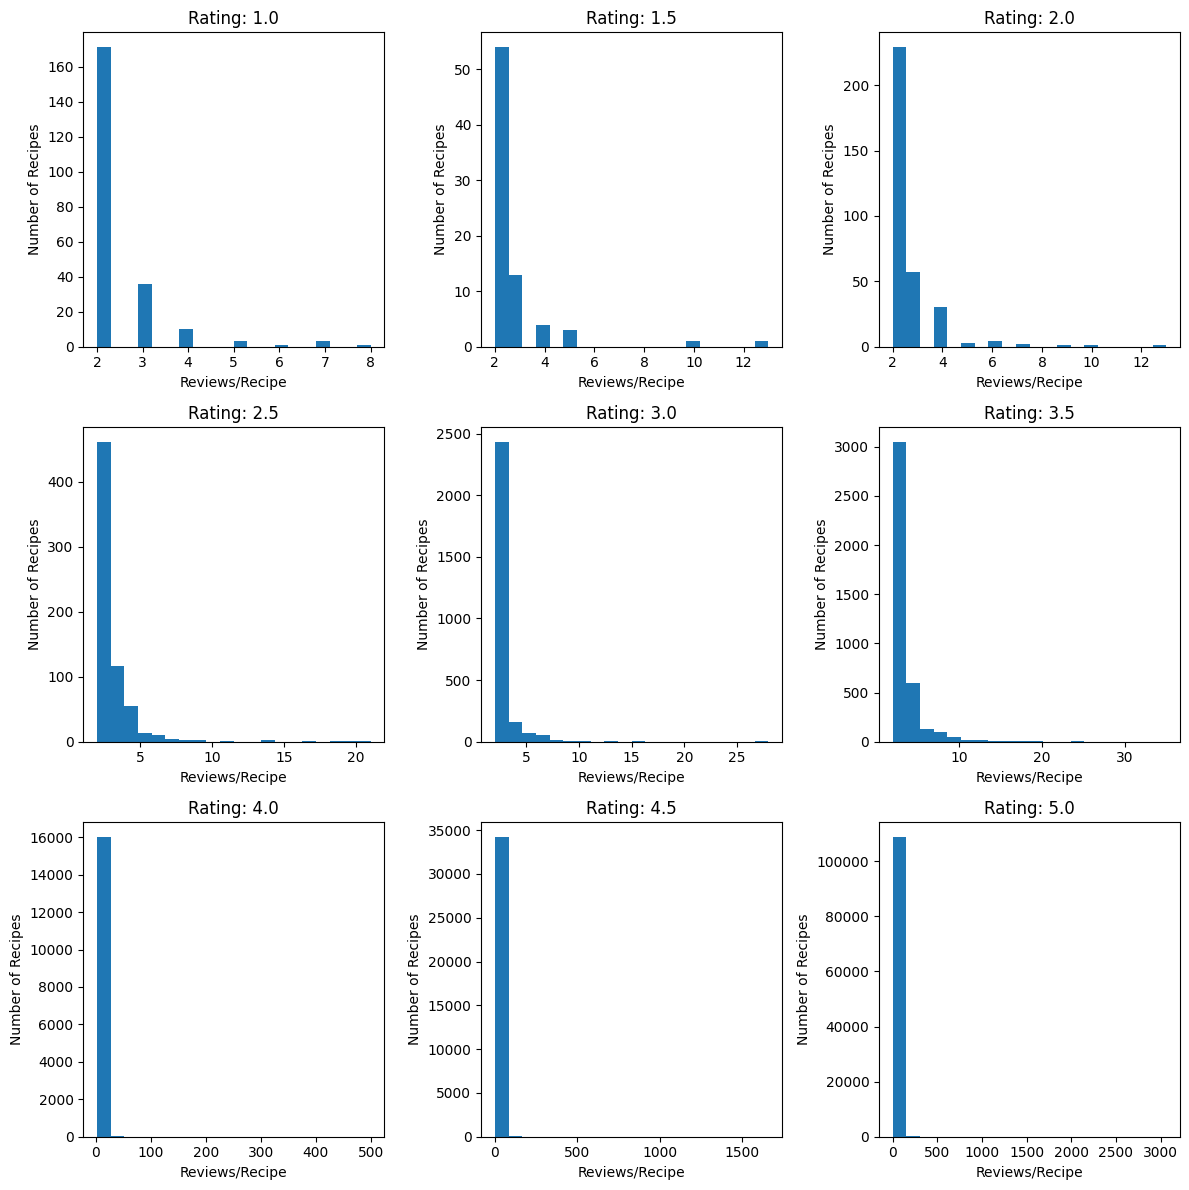

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i in range(9):
  rate = i*0.5+1
  slicer = a[a.AggregatedRating == rate]
  slicer = slicer[slicer.ReviewCount > 1]

  ax = axs[i//3, i%3]
  ax.hist(slicer["ReviewCount"], label=str(rate), bins=20)  # Example: vary sine wave
  ax.set_title(f"Rating: {rate}")
  ax.set_xlabel("Reviews/Recipe")
  ax.set_ylabel("Number of Recipes")

  #print(pred)
  print()
fig.tight_layout()

In [ ]:
plt.scatter(a1.AggregatedRating, a1.ReviewCount, alpha=0.005)
plt.ylim(0, 10)

NameError: name 'a1' is not defined

In [ ]:
plt.hist(a.ReviewCount)
#plt.xlabel("Rating")

In [ ]:
# Percentage of data with single review
len(a1[a1.ReviewCount == 1])/ len(a1)

In [ ]:
# Unused info

# a = a.drop(["AuthorId", "AuthorName", "DatePublished", "Images"], axis=1)
# Due to CookTime/Preptime containing NaNs occasionally they will be removed
# a = a.drop(["CookTime", "PrepTime"], axis=1)


# RecipeYield is difficult to categorize: 4 kebabs vs 1 8x8 cake pan
#a = a.drop("RecipeYield", axis=1)
# Removing Empty data
a = a.dropna(subset=["AggregatedRating", "ReviewCount"])

# Not dropping rows because an empty instructions can contribute to bad ratings.
a["RecipeInstructions"] = a["RecipeInstructions"].fillna('')
a["RecipeInstructions"] = a["RecipeInstructions"].apply(lambda i: i[3:-2].replace("\", \"", " ").replace("\",\"", " ").replace("\", \n\"", " "))

# Still limit review count for better data ()
a = a[a.ReviewCount > 1]
a

In [ ]:
import ast

# Text/sentences are in the form of R's character vector
# This converts the character vector into an actual list
def r_to_list(string):
  if type(string) != str:
    print(type(string), string)
    return []

  if string[0:2] == "c(":
    """
    # Not splitting by \",\" because when NaN is in list there isn't a
    items = [x.strip().strip('"') for x in string.split(", ")]

    # Removing " and \n
    temp = string[2:-1].replace("\", \"", ";").replace("\"", "")
    """
    return ast.literal_eval(string.replace("c(", "[").replace(")", "]"))

  # # No need to clean if not in R syntax (single item)
  return [string.replace("\"", "")]

#RecipeIngredientQuantities	RecipeIngredientParts

a["RecipeIngredientParts"] = a["RecipeIngredientParts"].apply(r_to_list)
a["RecipeIngredientParts"]

# NOTE: Recipe Ingredients contains just "character(0)" in 3 separate occasions

In [ ]:
# Combine RecipeIngredientQuantities with RecipeIngredientParts?
# Previous idea is to multiply the vector representing the ingredient by the quantity of the ingredient (Ex: [0.2, 0.3...] * 3 represents 3 lemons)
# however that runs into the issue of us not knowing the unit of measurement of quantity.
# Ex: 450 flour vs 70 oil vs 2 apples
# Current solution is to just add the unit onto the end of the ingredient string so BERT figures out the quantity that makes the most sense instead.

from fractions import Fraction
import re

def fract_to_string(fract):
  if re.match(r'^\d+\s+\d+/\d+$', fract):  # Mixed number like "6 1/2"
    whole, frac = fract.split()
    return f"{float(whole) + float(Fraction(frac)):.2f}"
  elif re.match(r'^\d+/\d+$', fract):  # Simple fraction like "1/2"
    return f"{float(Fraction(fract)):.2f}"
  else:  # Whole number or decimal
    return fract

def merge_lists(quantities, parts=None):
  # This happens when quantities = nan
  if type(quantities) != str:
    return parts

  if quantities[0:2] == "c(":
    # Not splitting by \",\" because when NaN is in list there isn't a
    items = [x.strip().strip('"') for x in quantities[2:-1].split(",")]

    if len(items) != len(parts):
      # If items do not align then skip adding quantities
      # Ex: ['1', '2', '2'] ['vanilla ice cream']
      return parts

    result = []
    for i in range(len(items)):
      it = items[i]
      p = parts[i]

      if it == "NA":
        result.append(p)

      # Range of values Ex "1  - 1 1/2"
      if "-" in it:
        it = it.split("-")
        result.append(p + " (" + fract_to_string(it[0].strip()) + "-" + fract_to_string(it[1].strip()) + ")")
      else:
        result.append(p + " (" + fract_to_string(it) + ")")


    # Removing " and \n
    #print(result)
    return result

  # No need to clean if not in R syntax (single item)
  if (len(parts) == 1):
    print(parts)
    return [parts[0] + " (" + quantities.replace('"', "") + ")"]

  return parts

#a = a.drop(["CookTime", "PrepTime"], axis=1)
a["RecipeIngredientParts"] = a.apply(lambda i: merge_lists(i["RecipeIngredientQuantities"], i["RecipeIngredientParts"]), axis=1)
a["RecipeIngredientParts"]

In [ ]:
#b = pd.read_csv("/content/drive/MyDrive/kaggle_recipe_data/reviews.csv")
# display(b.groupby("RecipeId").count().sort_values("ReviewId"))
#b

In [ ]:
#Cleaning time notation
# From chatgpt
def to_min(duration):
  if pd.isna(duration):
    return None
  match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?', duration)
  hours = int(match.group(1)) if match.group(1) else 0
  minutes = int(match.group(2)) if match.group(2) else 0
  return hours * 60 + minutes

#a["CookTime"] = a["CookTime"].apply(to_min)
#a["PrepTime"] = a["PrepTime"].apply(to_min)
a["TotalTime"] = a["TotalTime"].apply(to_min)
a

In [ ]:
# RecipeCategory is probably not the best metric to measure ratings
plt.hist(a.groupby("RecipeCategory").count()["Description"])

In [ ]:
# Save csv
a = a.drop(["RecipeCategory","Keywords","RecipeIngredientQuantities"], axis=1)
a.to_csv("/content/drive/MyDrive/kaggle_recipe_data/cleaned_recipes.csv")

---
# More Preliminary Data Analysis

In [ ]:
# Mapping CookTime, PrepTime, and TotalTime's influence on Aggregate Ratings
temp = a[['CookTime', 'PrepTime',
       'TotalTime']]
y = a["AggregatedRating"]
scaler = MinMaxScaler()
temp = pd.DataFrame(scaler.fit_transform(temp), columns=temp.columns)

for i in temp.columns:
  print(i)
  plt.scatter(y, temp[i], label=i, alpha=0.1)
  plt.ylim(top=0.1)
  plt.show()

In [ ]:
# Seeing how Description and RecipeInstruction lengths influence Aggregate Ratings

temp = a[["Description", "RecipeInstructions"]].fillna('')
for i in temp.columns:
  z = temp[i].apply(len)
  print(i)
  plt.scatter(y, z, alpha=0.005)
  plt.show()

In [ ]:
# Finding the amount of recipes in each rating
temp = a[a.ReviewCount > 1].groupby("AggregatedRating").count()
display(temp["Description"])

In [ ]:
# RecipeIngredientParts
print(a.iloc[0].RecipeIngredientParts[3:-2])
a.iloc[0].RecipeIngredientQuantities[3:-2].split("\", \"")

---

# Test/Validation sets

Issues: Data (Ratings) is an ordinal variable, meaning it is ordered but not

1. Select ~150 random samples from each Rating category

  A. Ignore 1.5 rating due to limited number

  B. Increase sample amount if accuracy isn't good enough.

Models (mix and match)

1. Just BERT encode ingredients and use that data to predict ratings

  A. Try another subset where you multiply encodings with ingredient amounts.

2. BERT encode recipe and use that data to predict ratings

3. Classic neural net using nutrition and cooking time. Recipe length?

In [ ]:
display(a.groupby("AggregatedRating").count())

In [ ]:
# Select 150 random samples from each Rating category

def train_set(a, replace=False):
  train = pd.DataFrame()
  val = pd.DataFrame()
  test = pd.DataFrame()
  # Will leave 1.5 in despite not having as much data for now (so training and test sets will contain same data for 1.5 rating)
  for i in [1,1.5,2,2.5, 3. , 3.5, 4. , 4.5, 5]:
    slicer = a[a.AggregatedRating == i]

    lim = 2500

    if (len(slicer) < lim):
      if replace:
        temp = slicer.sample(int(lim*0.8), replace=True).reset_index(drop=True)
        train = pd.concat([train, temp], ignore_index=True)
        if (len(slicer) > lim*0.1):
          val = pd.concat([val, slicer.sample(int(lim*0.1), replace=True).reset_index(drop=True)], ignore_index=True)
          test = pd.concat([test, slicer.sample(int(lim*0.1), replace=True).reset_index(drop=True)], ignore_index=True)
          continue

        val = pd.concat([val, slicer], ignore_index=True)
        test = pd.concat([test, slicer], ignore_index=True)
        continue

      print(i)
      temp = slicer.sample(len(slicer)).reset_index(drop=True)
    else:
      temp = slicer.sample(lim).reset_index(drop=True)

    test_temp = temp.sample(frac=0.1)
    test = pd.concat([test, test_temp], ignore_index=True)

    temp = temp.drop(test_temp.index)
    val_temp = temp.sample(frac=1/9)
    val = pd.concat([val, val_temp], ignore_index=True)

    train = pd.concat([train, temp.drop(val_temp.index)], ignore_index=True)
  return train, val, test

In [ ]:
train, val, test = train_set(a, True)

display(train.groupby("AggregatedRating").count().Name)
display(val.groupby("AggregatedRating").count().Name)
display(test.groupby("AggregatedRating").count().Name)

---
# Training Ridge Regression

- Train model based on SBERT

In [ ]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sentence_transformers import SentenceTransformer, util

In [ ]:
def result_hist(y_test, predictions):

  plt.hist(y_test, bins=[0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25])
  plt.hist(predictions, bins=[0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25], alpha=0.5)
  plt.show()

In [ ]:
x_train = train.RecipeInstructions.to_numpy()
y_train = train.AggregatedRating.to_numpy()

x_val = val.RecipeInstructions.to_numpy()
y_val = val.AggregatedRating.to_numpy()

x_test = test.RecipeInstructions.to_numpy()
y_test = test.AggregatedRating.to_numpy()

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
# Encoding
X_val = model.encode(x_val)
X_test = model.encode(x_test)
X_train = model.encode(x_train)

In [ ]:

# Train regression model (Ridge is simple + works well)
regressor = Ridge(alpha=1.0)
regressor.fit(X_train, y_train)

# Predict on the validation set
y_pred = regressor.predict(X_val)

# Compute the training loss (Mean Squared Error)
train_loss = mean_squared_error(y_train, regressor.predict(X_train))
val_loss = mean_squared_error(y_val, y_pred)

print(f"Training Loss (MSE): {train_loss}")
print(f"Validation Loss (MSE): {val_loss}")

predictions = regressor.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

In [ ]:
result_hist(y_test, predictions)

In [ ]:
x_everything = model.encode(a.RecipeInstructions.to_numpy())
y_everything = a.AggregatedRating.to_numpy()
predictions = regressor.predict(x_everything)
print("Test MSE:", mean_squared_error(y_everything, predictions))

In [ ]:
predictions = regressor.predict(x_everything)
print("Test MSE:", mean_squared_error(y_everything, predictions))


MSE for 225 samples (Stars 1-5):

> Training Loss (MSE): 1.23611810387001
>
> Validation Loss (MSE): 1.5667101556354883
>
> Test MSE: 1.3936351705545431

MSE for 225 samples (Stars 3-5):

> Training Loss (MSE): 1.3593852071886652
>
> Validation Loss (MSE): 1.4624971323290816
>
> Test MSE: 1.429964690131674

MSE for 600 samples (Stars 1-5):

> Training Loss (MSE): 1.23611810387001
>
> Validation Loss (MSE): 1.5667101556354883
>
> Test MSE: 1.3936351705545431

MSE for 2500 samples (Stars 1-5): More spread out in histogram though:

> Training Loss (MSE): 1.3401566783971675
>
> Validation Loss (MSE): 1.3846154609295271
>
> Test MSE: 1.4148778344737325

MSE for 2500 samples (Stars 1-5): # 2
>Training Loss (MSE): 1.3460721014673387
>
>Validation Loss (MSE): 1.3684840898568502
>
>Test MSE: 1.3725875750274592

MSE for 600 samples (Stars 3-5):

> Training Loss (MSE): 0.44443022001562005
>
>Validation Loss (MSE): 0.5027299551218765
>
>Test MSE: 0.50976798542573

MSE for 600 samples(Stars 2.5-5):
>Training Loss (MSE): 0.643632585542885
>
>Validation Loss (MSE): 0.7490430865015354
>
>Test MSE: 0.7641926373020728
---

MSE for 255 samples (Stars 3-5), Using first val/test:

> Training Loss (MSE): 0.40408112183503614
>
>Validation Loss (MSE): 2.557120427603856
>
>Test MSE: 2.681072972705677

MSE for 255 samples (Stars 2.5-5), Using first val/test:
>Training Loss (MSE): 0.6051749768125259
>
>Validation Loss (MSE): 2.1092828494753326
>
>Test MSE: 2.157709831478301

MSE for 600 samples (Stars 2.5-5), Using first val/test:
>Training Loss (MSE): 0.6498022455250368
>
>Validation Loss (MSE): 2.176261720563711
>
>Test MSE: 2.1597104193233196


** for 2500 samples (Stars 3-5), Using first val/test: (hist seems focused between 3.5-4.5) **
> Training Loss (MSE): 0.4709096375554579
>
> Validation Loss (MSE): 2.5761128005971616
>
> Test MSE: 2.5768043793859716

---

Limited 1-2 ratings, 600
>Training Loss (MSE): 1.0868908643971014
>
>Validation Loss (MSE): 1.2416867116057286
>
>Test MSE: 1.2165158137672667

---

2000 samples, replaced training, non replaced val/test
>
>
>
>
>

In [ ]:
model = LogisticRegression(solver='lbfgs',max_iter=2000).fit(X_train, y_train*2)
# Predict on the validation set
train_loss = mean_squared_error(y_train, regressor.predict(X_train))

print(f"Training Loss (MSE): {mean_squared_error(y_train, model.predict(X_train)/2)}")
print(f"Validation Loss (MSE): {mean_squared_error(y_val, model.predict(X_val)/2)}")
print("Test MSE:", mean_squared_error(y_test, model.predict(X_test)/2))

---
# Using Ordered Model/Linear Regression instead of Linear Regression

Ridge regression's best performance seems to be ~1.4 MSE. Predictions look like bell curve.

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train.shape

In [ ]:
#scaler = StandardScaler()
#X_train = scaler.transform(x_train)
model_o = OrderedModel(endog=y_train, exog=X_train, distr='logit')
result = model_o.fit(method='bfgs', disp=False)

import joblib
# Save the fitted model to a file
joblib.dump(result, 'ordered_model600_limited.pkl')

In [ ]:
#chatgpt
def prob_to_class(probabilities):
    """
    Convert predicted probabilities to actual class labels.

    Parameters:
    - probabilities: Array of shape (n_samples, n_classes), output from OrderedModel.predict()
    - classes: Array of class labels (e.g., [0, 1, 2, 3, 4])

    Returns:
    - Predicted class labels corresponding to each sample.
    """
    classes = np.array([1,1.5,2,2.5,3,3.5,4,4.5,5])
    predicted_classes = np.argmax(probabilities, axis=1)  # Get index of max probability
    return classes[predicted_classes]

In [ ]:
train_loss = mean_squared_error(y_train, prob_to_class(result.predict(X_train)))
val_loss = mean_squared_error(y_val, prob_to_class(result.predict(X_val)))

print(f"Training Loss (MSE): {train_loss}")
print(f"Validation Loss (MSE): {val_loss}")

predictions = prob_to_class(result.predict(X_test))
print("Test MSE:", mean_squared_error(y_test, predictions))

result_hist(y_test, predictions)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(X_train, y_train)

train_loss = mean_squared_error(y_train, result.predict(X_train))
val_loss = mean_squared_error(y_val, result.predict(X_val))

print(f"Training Loss (MSE): {train_loss}")
print(f"Validation Loss (MSE): {val_loss}")

predictions = result.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

result_hist(y_test, predictions)

For 600 linear regression
		Training Loss (MSE): 1.0788725082659094
		Validation Loss (MSE): 1.808406352818384
		Test MSE: 2.179341969696303

---
# neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

(128, 64, 32, 1), learning 0.15 gives consistent 1.255 for validation loss

- learning 0.01 leads to overfitting

- Adding dropout (0.5 layers decreases validation and training (with learning 0.01)

Adding 256 layer reduced val loss to 1.19 (dropout is 0.4), learning 0.005

* For 50 epochs
---
Up to 200 epochs can get to 0.9, learning rate 0.005



In [ ]:
# Define the model
model = Sequential([
    #Dense(384, activation='relu', input_shape=(384,)),
    #Dense(512, activation='relu'),
    #Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1)  # Output layer for regression
])
optimizer = Adam(learning_rate=0.005)
# , metrics=['mse'] same thing as loss
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

In [ ]:
model.summary()

In [ ]:
def plot_hist(history):
  x = range(1, len(history.history["loss"]) + 1)
  plt.plot(x, history.history['loss'], label="Training")
  plt.plot(x, history.history['val_loss'], label="Validation")
  #plt.ylim([0, 2])
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  plt.legend()
  plt.title("Loss")
  plt.show()
  """
  plt.plot(x, history.history['mse'], label="Training")
  plt.plot(x, history.history['val_mse'], label="Validation")
  plt.ylim([0.5, 1.5])
  plt.xlabel("epoch")
  plt.ylabel("MSE")
  plt.legend()
  plt.title("MSE")
  plt.show()
  """

plot_hist(history)

In [ ]:
#model.save("/content/drive/MyDrive/600Recipe.keras")

In [ ]:
mean_squared_error(y_test, model.predict(X_test).reshape(2051))

In [ ]:
result_hist(y_test, model.predict(X_test))

In [ ]:
for i in range(9):
  print(i*0.5+1, mean_squared_error(y_test[y_test==i*0.5 + 1], model.predict(X_test).reshape(2051)[y_test==i*0.5 + 1]))
  print()

---
# Trained SBERT

In [ ]:
# https://sbert.net/docs/sentence_transformer/training_overview.html
# https://www.marqo.ai/course/training-fine-tuning-sentence-transformers

from sentence_transformers import (
    SentenceTransformer,
    SentenceTransformerTrainer,
    SentenceTransformerTrainingArguments,
    InputExample
)
from sentence_transformers.losses import MSELoss, BatchHardTripletLoss, BatchSemiHardTripletLoss
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from torch.utils.data import DataLoader

from datasets import Dataset

from datasets import load_dataset

In [ ]:
"""
train_examples = [
    InputExample(texts=[row['RecipeInstructions']], label=float(row['AggregatedRating']))
    for _, row in train.iterrows()
]
eval_examples = [
    InputExample(texts=[row['RecipeInstructions']], label=float(row['AggregatedRating']))
    for _, row in val.iterrows()
]
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
"""

# If you get the byte->float error just remake the train and val datasets
train_examples = Dataset.from_dict({
    "Texts": train["RecipeInstructions"],
    "score": train["AggregatedRating"],
})
val_examples = Dataset.from_dict({
    "Texts": val["RecipeInstructions"],
    "score": val["AggregatedRating"],
})

In [ ]:
sbert = SentenceTransformer('all-MiniLM-L6-v2')
#sbert = SentenceTransformer("/content/drive/MyDrive/SBertRecipe")
loss = BatchHardTripletLoss(model=sbert)
#loss = BatchSemiHardTripletLoss(model=sbert)

In [ ]:
args = SentenceTransformerTrainingArguments(
    # Required parameter:
    output_dir="/content/drive/MyDrive/SBertRecipe2",

    num_train_epochs=6,
    #per_device_train_batch_size=16,
    #per_device_eval_batch_size=16,
    #learning_rate=2e-5,
    #warmup_ratio=0.1,
    #fp16=False,  # Set to False if you get an error that your GPU can't run on FP16
    #bf16=True,  # Set to True if you have a GPU that supports BF16
    #batch_sampler=BatchSamplers.NO_DUPLICATES,  # MultipleNegativesRankingLoss benefits from no duplicate samples in a batch
    # Optional tracking/debugging parameters:
    eval_strategy="steps",
    #eval_steps=100,
    #save_strategy="steps",
    #save_steps=100,
    #save_total_limit=2,
    #logging_steps=100,
    #run_name="mpnet-base-all-nli-triplet",  # Will be used in W&B if `wandb` is installed
    nan_inf_filter=True
)
trainer = SentenceTransformerTrainer(
    model=sbert,
    args=args,
    train_dataset=train_examples,
    eval_dataset=val_examples,
    loss=loss,
)
trainer.train()

In [ ]:
trainer.train()

In [ ]:
trainer.train()

In [ ]:
sbert.save("/content/drive/MyDrive/SBertRecipe3-5")

In [ ]:
plt.plot([i["loss"] for i in trainer.state.log_history[0:-2] if "loss" in i], label="Training")
plt.plot([i["eval_loss"] for i in trainer.state.log_history[0:-2] if "eval_loss" in i], label="Eval")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("SBERT Training Loss Over Epochs 7-12")

In [ ]:
trainer.state.log_history

In [ ]:

trainer.train()

In [ ]:
SentenceTransformer("/content/drive/MyDrive/SBertRecipe")

### Section: LLaMA + PEFT (LoRA) Fine-Tuning

In [ ]:
# ==========================================
# Section: LLaMA + PEFT (LoRA) Fine-Tuning
# ==========================================

# Install required libraries if not already installed
!pip install -q transformers accelerate peft bitsandbytes

from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
from peft import get_peft_model, LoraConfig, TaskType
import torch



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 7.0 MB/s eta 0:00:00


In [ ]:
# Load a small LLaMA-compatible model from Hugging Face for PEFT
model_name = "meta-llama/Llama-2-7b-hf"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", load_in_8bit=True)



OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Llama-2-7b-hf.
401 Client Error. (Request ID: Root=1-67fc0df3-7368f101792869407c26cfe0;3c64c6e0-d656-4d5e-b7e1-6ae2227f2747)

Cannot access gated repo for url https://huggingface.co/meta-llama/Llama-2-7b-hf/resolve/main/config.json.
Access to model meta-llama/Llama-2-7b-hf is restricted. You must have access to it and be authenticated to access it. Please log in.

In [ ]:

# PEFT configuration with LoRA
peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    inference_mode=False,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    bias="none"
)

model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

# Example input formatting
example_prompt = "### Recipe Instructions: Preheat oven to 350°F. Mix flour and sugar. ### Predict Rating:"
inputs = tokenizer(example_prompt, return_tensors="pt").to(model.device)
outputs = model.generate(**inputs, max_new_tokens=10)
print(tokenizer.decode(outputs[0]))